# Data Analysis Project – Biotério Nanci do Nascimento 
    This project was motivated by the observation of an animal population surplus during routine activities at the vivarium. The initial proposal to optimize the population was met with some apprehension from the technical management, which challenged me to prove, through data analysis, the feasibility of reducing the number of animals while maintaining a safety margin. The objective is to demonstrate that this optimization can lead to direct benefits, such as a reduction in operational costs (e.g., feed, bedding) and, most importantly, a decrease in the workload for the technical staff.

### Importing Data
    The vivarium_data.csv file was manually compiled from official documents of the Biotério Nanci do Nascimento, located at the Nuclear and Energy Research Institute (IPEN-USP). The objective was to gather all the important information required for the analyses I intended to perform.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('vivarium_data.csv')
print (df)

      Ano       Mês     Linhagem  Número Amostral          Idade peso
0    2006  dezembro     Lit/scid              144   45 a 90 dias  NaN
1    2007     março  Balb/c nude              180     10 semanas  NaN
2    2007    agosto        Swiss               75    4-5 semanas  NaN
3    2007    agosto  Balb/c nude               30    4-5 semanas  NaN
4    2007   outubro      C57BL-6              100   6-10 semanas  NaN
..    ...       ...          ...              ...            ...  ...
250  2024     abril      lit/lit               90   30 a 60 dias  NaN
251  2024     março       Balb/c               90      7 semanas  NaN
252  2024     março       Balb/c               40      5 semanas  NaN
253  2024     março         scid               28      5 semanas  NaN
254  2024   janeiro  Balb/c nude               84  6 - 8 semanas  NaN

[255 rows x 6 columns]


### Data Cleaning and Standardization

    The dataset underwent a cleaning and standardization process. Textual data in several columns were standardized by converting them to lowercase and trimming excess spaces.

    Additionally, the 'peso' (weight) column was dropped due to its high volume of NaN values and its low relevance to this study. Finally, rows with missing age entries were removed to prepare the dataset for a more accurate exploratory analysis of animal strain and age.

    To demonstrate my English skills and make this work more globally accessible, I translated the column names into English. The following columns were also standardized by converting text to lowercase, trimming whitespace, and removing accents.
    
        ano was renamed to year;
        
        mes was renamed to month;
        
        linhagem was renamed to strain;
        
        numero_amostral was renamed to sample_size;
        
        idade was renamed to age.

In [3]:
df.columns = df.columns.str.strip().str.lower() #padronização de colunas
df.rename(columns={'ano':'year','mês':'month','linhagem': 'strain','número amostral':'sample_size', 'idade':'age'}, inplace=True) #arrumando as colunas com acento e espaço
df.dropna(subset=['age'], inplace=True) #remove linhas que possuem NaN na idade
df.drop(columns=['peso'], inplace = True) #remove coluna peso já que possui muito NaN
df['strain'] = df['strain'].str.lower().str.strip() #padronização das linhagens

print (df)

     year     month       strain  sample_size            age
0    2006  dezembro     lit/scid          144   45 a 90 dias
1    2007     março  balb/c nude          180     10 semanas
2    2007    agosto        swiss           75    4-5 semanas
3    2007    agosto  balb/c nude           30    4-5 semanas
4    2007   outubro      c57bl-6          100   6-10 semanas
..    ...       ...          ...          ...            ...
250  2024     abril      lit/lit           90   30 a 60 dias
251  2024     março       balb/c           90      7 semanas
252  2024     março       balb/c           40      5 semanas
253  2024     março         scid           28      5 semanas
254  2024   janeiro  balb/c nude           84  6 - 8 semanas

[228 rows x 5 columns]


## Initial Analysis

### Number per strain
    The analysis started with a direct focus on the primary objective: reducing the mouse population within a safe margin. The first necessary step was to identify the most requested strains. This would enable a focused strategy for population reduction on these key strains, while also considering an on-demand breeding/buy system for those less frequently used.

In [4]:
df_npl = df[['strain', 'sample_size']] #npl = number per strain
print (df_npl)

          strain  sample_size
0       lit/scid          144
1    balb/c nude          180
2          swiss           75
3    balb/c nude           30
4        c57bl-6          100
..           ...          ...
250      lit/lit           90
251       balb/c           90
252       balb/c           40
253         scid           28
254  balb/c nude           84

[228 rows x 2 columns]


In [5]:
df_npl.groupby('strain')['sample_size'].sum()

strain
balb/c         3799
balb/c nude    5596
c57bl-6        2090
lit/lit         401
lit/scid        426
scid            531
swiss          1860
Name: sample_size, dtype: int64

### Strain Comparison Charts
    Lets look the following chart to provides initial insights into the strain distribution.

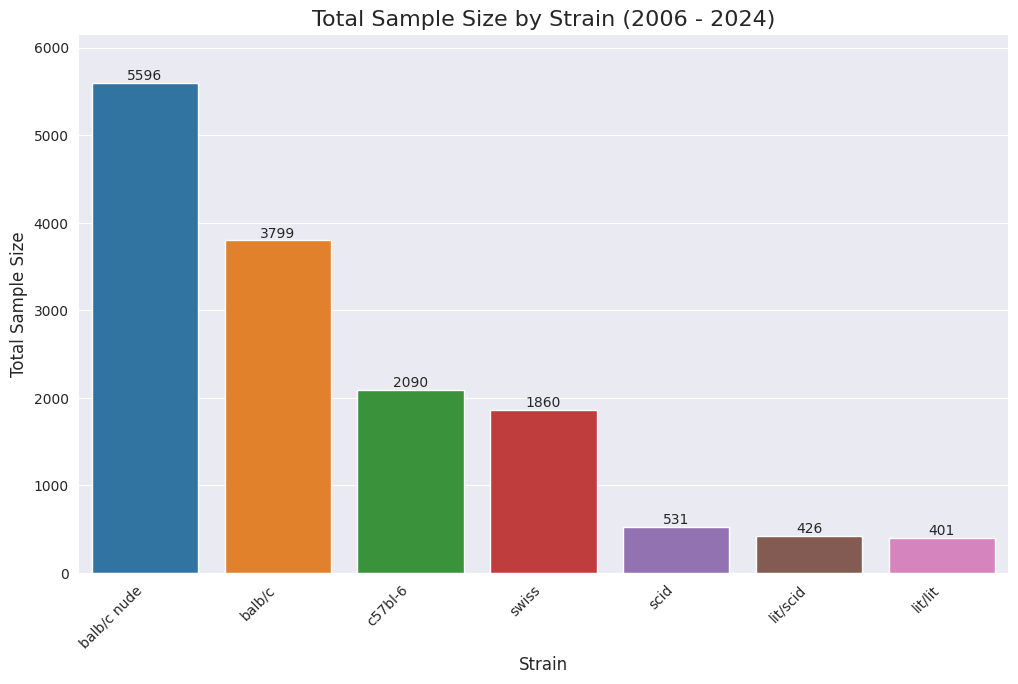

In [6]:
df_group_s_s = df.groupby('strain')['sample_size'].sum().reset_index() #df group by strain and sample
df_group_s_s = df_group_s_s.sort_values('sample_size', ascending=False)

sns.set_style('darkgrid')

plt.figure(figsize=(12, 7))

g = sns.barplot(data=df_group_s_s, x='strain', y='sample_size', hue='strain')

for container in g.containers:
    g.bar_label(container, fontsize=10)

g.set_title('Total Sample Size by Strain (2006 - 2024)', fontsize=16)
g.set_xlabel('Strain', fontsize=12)
g.set_ylabel('Total Sample Size', fontsize=12)
g.set_ylim(0, df_group_s_s['sample_size'].max() * 1.1) 

plt.xticks(rotation=45, ha='right')


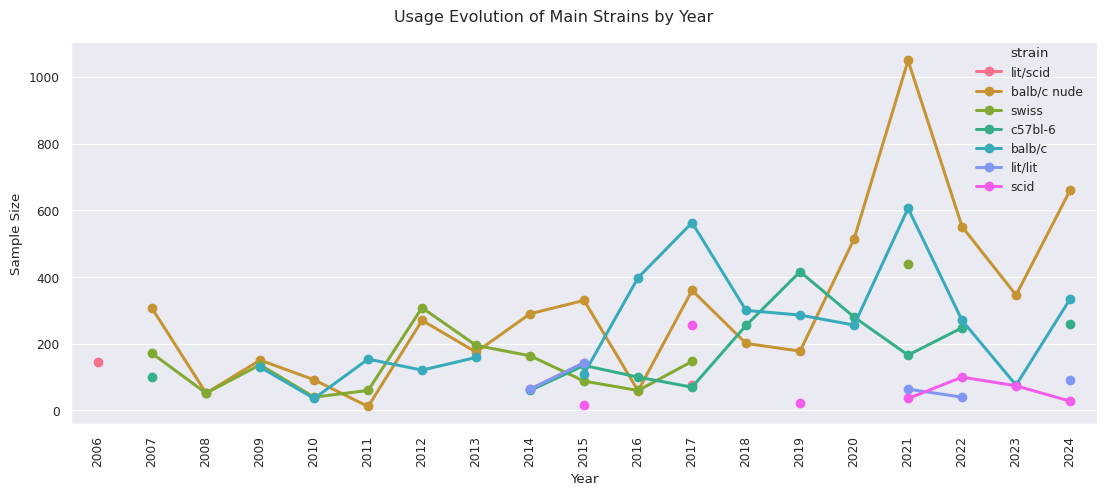

In [13]:
sns.set_style('darkgrid')
sns.set_palette ('PRGn')
sns.set_context('paper')

g = sns.catplot(data=df, kind='point', x='year',y='sample_size', hue='strain', errorbar=None, height=5, aspect=2, estimator ='sum')

g.fig.suptitle('Usage Evolution of Main Strains by Year')
g.set(xlabel='Year',ylabel='Sample Size')
g.legend.set_bbox_to_anchor((0.98, 0.75)) 

plt.xticks(rotation=90)

plt.tight_layout()

#### Insights 
From these charts, we can already have some conclusions:

    The three most requested strains are: Nude, BALB/c, and C57BL/6.

        The second chart shows that these strains have been consistently requested up to the most recent date included in this analysis.

    The three least requested strains are: LIT/LIT, LIT/SCID, and SCID.

        These strains have very few requests, and we can see that the last order for LIT/SCID was in 2017. Therefore, they are low-demand strains, which means we could switch to an "on-demand" breeding system or even purchase them from other institutions. This could be more advantageous and cost-effective than maintaining a breeding stock that requires constant changes of bedding and feed.

    Although the Swiss strain is in the middle range (ranking fourth overall), the last time it was requested was in 2021. This suggests that it could also be managed using an on-demand system.

## Age Standardization
    The primary objective was to process the age column within the df DataFrame. This column was unsuitable for numerical calculations or visualizations because it contained inconsistent, non-numeric text formats (e.g., "10 semanas (weeks)", "8 a 10 dias (days)", "2 meses (months)"). The goal was to implant a new feature, age_in_days, that represents this information in a standardized, purely numerical format.


In [8]:
import re
def convert_age_to_days(text_age):
   
    if not isinstance(text_age, str):
        return np.nan

    text_age = text_age.lower() 

    number = re.findall(r'\d+', text_age)

    if not number:
        return np.nan

    number = [float(n) for n in number]
    numeric_value = np.mean(number)

    if 'semana' in text_age:
        return numeric_value * 7
    elif 'mes' in text_age or 'mes' in text_age:
        return numeric_value * 30
    elif 'dia' in text_age:
        return numeric_value
    else:

        return np.nan

df['age_days'] = df['age'].apply(convert_age_to_days)


print(df[['age', 'age_days']].head())


            age  age_days
0  45 a 90 dias      67.5
1    10 semanas      70.0
2   4-5 semanas      31.5
3   4-5 semanas      31.5
4  6-10 semanas      56.0


## Age Chart
    The objective of this script is to conduct an exploratory analysis of the standardized age_in_days column. This is achieved by first calculating descriptive statistics to numerically summarize the age data. Following this, a histogram is generated to visually represent the distribution, aiming to identify the most frequent age groups and the overall pattern of the animals' ages upon request.

count    228.000000
mean      61.813596
std       26.162768
min       15.000000
25%       42.000000
50%       56.000000
75%       70.000000
max      140.000000
Name: age_days, dtype: float64


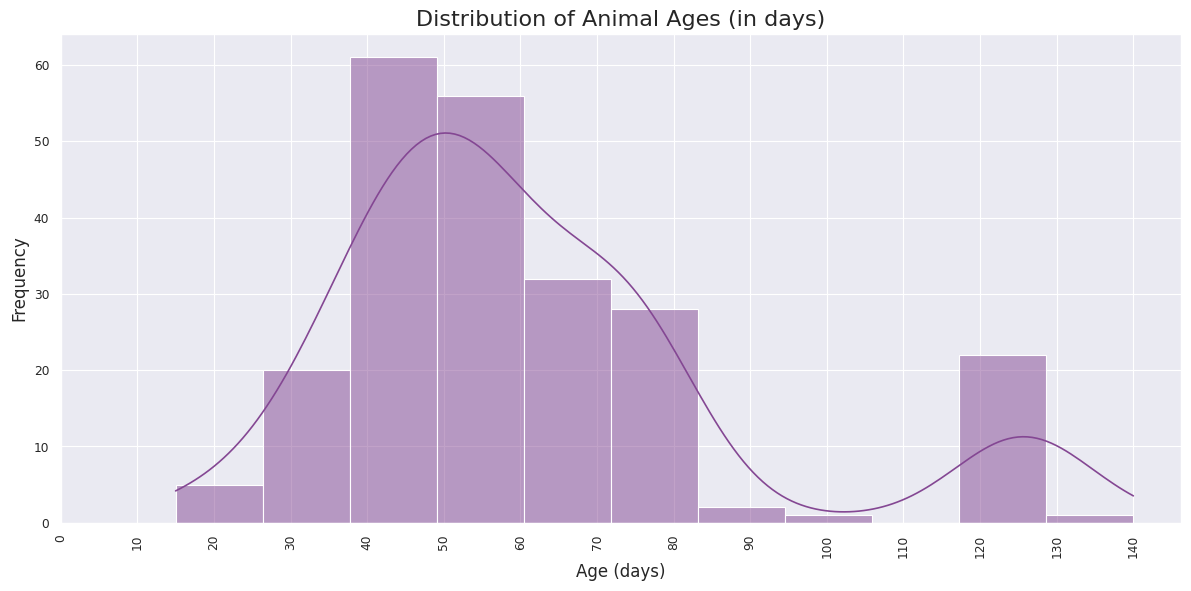

In [9]:
resumo_idade = df['age_days'].describe()
print (resumo_idade)


sns.set_style('darkgrid')
sns.set_palette ('PRGn')
sns.set_context('paper')

plt.figure(figsize=(12, 6))


g = sns.histplot(data=df, x='age_days', bins=11, kde=True)

g.set_title('Distribution of Animal Ages (in days)', fontsize=16)
g.set_xlabel('Age (days)', fontsize=12)
g.set_ylabel('Frequency', fontsize=12)

plt.xticks(np.arange(0, df['age_days'].max() + 10, 10))
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('animal_age_distribution_histogram.png')
plt.show()

### Insights

    The data indicates a high frequency of requests concentrated within the 40 to 70-day age range.

    There is minimal demand for animals at either extreme of the age spectrum (very young or very old). The presence of a "long tail" in the distribution suggests that while requests for older animals are infrequent, they are not nonexistent.

    This insight suggests that maintaining a large inventory of animals beyond their peak demand window (approximately 80 days) leads to an inefficient use of resources, including feed, bedding, and facility space. This finding supports the implementation of a culling or reallocation policy for older animals to optimize operational costs and resource management.

## Months
    To prepare the data for analysis, the month column underwent two key transformations:
    
        First, The Data_vivarium_csv had a month column containing the names of months as text (e.g., "Janeiro" (January), "Fevereiro" (February). To a computer, these strings don't have an order; The objective of this code is to create a new column, month_num, which represents the months numerically (1 for January, 2 for February, etc.). This step is essential for correctly sorting the data chronologically and for creating time-series plots.
        
        Second, the names were translated from Portuguese to English to ensure international accessibility.
        
    Subsequently, a new, cleaner DataFrame was generated to streamline all following stages of the analysis.

In [10]:
#number months
month_num = {'janeiro': 1, 'fevereiro': 2, 'março': 3, 'abril': 4, 'maio': 5, 'junho': 6, 'julho': 7, 'agosto': 8, 'setembro': 9, 'outubro': 10, 'novembro': 11, 'dezembro': 12}

df['month_num'] = df['month'].str.lower().map(month_num)

#translation months
month_translation = {'janeiro': 'january', 'fevereiro': 'february', 'março': 'march', 'abril': 'april', 'maio': 'may', 'junho': 'june', 'julho': 'july', 'agosto': 'august', 'setembro': 'september', 'outubro': 'october', 'novembro': 'november', 'dezembro': 'december'}

df['month_en'] = df['month'].map(month_translation)

df_cleaned_vivarium_data=df.drop(columns=['age','month'])

print (df.head())
print (df_cleaned_vivarium_data.head())

   year     month       strain  sample_size           age  age_days  \
0  2006  dezembro     lit/scid          144  45 a 90 dias      67.5   
1  2007     março  balb/c nude          180    10 semanas      70.0   
2  2007    agosto        swiss           75   4-5 semanas      31.5   
3  2007    agosto  balb/c nude           30   4-5 semanas      31.5   
4  2007   outubro      c57bl-6          100  6-10 semanas      56.0   

   month_num  month_en  
0         12  december  
1          3     march  
2          8    august  
3          8    august  
4         10   october  
   year       strain  sample_size  age_days  month_num  month_en
0  2006     lit/scid          144      67.5         12  december
1  2007  balb/c nude          180      70.0          3     march
2  2007        swiss           75      31.5          8    august
3  2007  balb/c nude           30      31.5          8    august
4  2007      c57bl-6          100      56.0         10   october


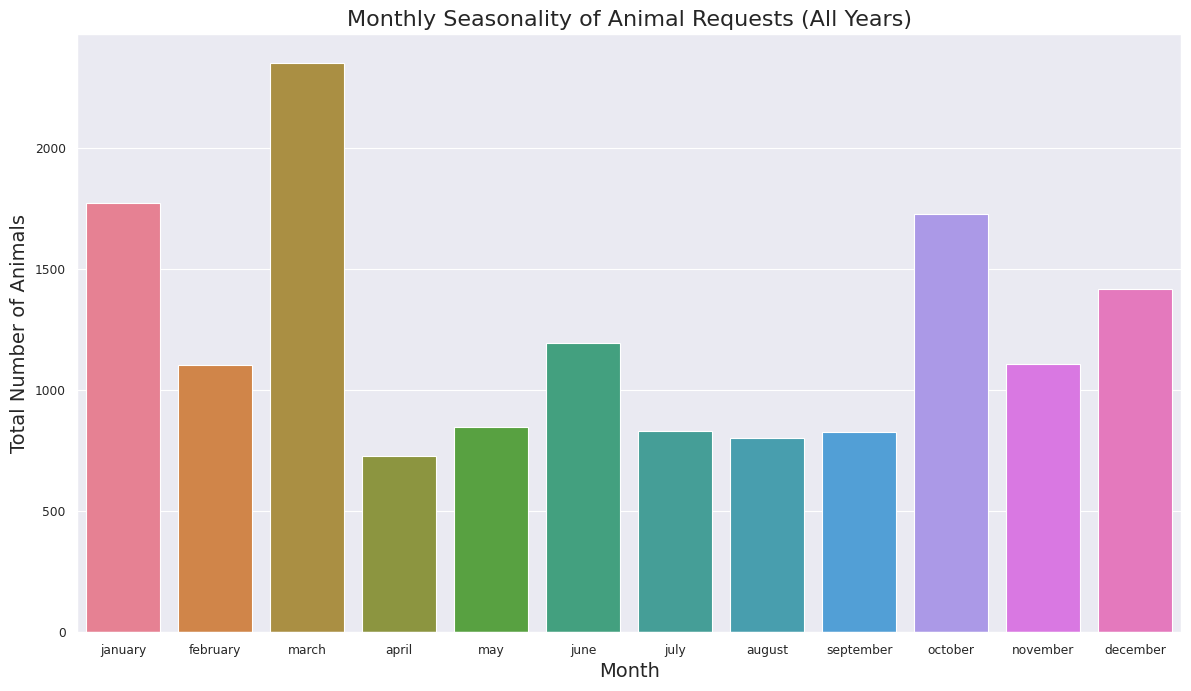

In [11]:
seasonality = df.groupby(['month_num', 'month_en'])['sample_size'].sum().reset_index()
seasonality = seasonality.sort_values('month_num')

plt.figure(figsize=(12, 7))

g = sns.barplot(data=seasonality, x='month_en', y='sample_size', hue='month_en')

g.set_title('Monthly Seasonality of Animal Requests (All Years)', fontsize=16)
g.set_xlabel('Month', fontsize=14)
g.set_ylabel('Total Number of Animals', fontsize=14)

plt.xticks(ha='center')
plt.tight_layout()


### Insights

    The start of the academic year marks the vivarium's peak operational period. This surge in demand is driven by investigators initiating new projects or key phases of their experiments after year-end planning.

    Consequently, the vivarium must be prepared to operate at maximum production and support capacity during the initial months of the year. This requires proactive resource management, specifically by scheduling matings well in advance to ensure a consistent supply of animals at the optimal age required for research protocols.

# New File
    A new csv file was created for import into the database SQL

In [12]:
df_cleaned_vivarium_data.to_csv('df_cleaned_vivarium_data.csv', index=False)